# 1. Compreensão do Dataset
Aluno: Michel Cirilo de Oliveira
Professor: Piva Junior

### 1.1 Carga de dados

In [4]:
# importando biblioteca com o pacote pandas
import pandas as pd

In [9]:
# Carregar o dataset para a memória --> aug_train.csv
df = pd.read_csv("aug_train.csv")

In [11]:
# Verificando o cabeçalho e primeiras linhas
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### 1.2 - FEATURES: df.attrs[]
---------------------------------------------------------------------------------------------

**enrollee_id**............: ID único para o candidato
**city**...................: Código da cidade
**city_development_index** : Índice de desenvolvimento da cidade (escalado)
**gender**.................: Gênero do candidato
**relevent_experience**....: Experiência relevante do candidato
**enrolled_university**....: Tipo de curso universitário matriculado, se houver
**education_level**........: Nível de educação do candidato
**major_discipline**.......: Principal disciplina de educação do candidato
**experience**.............: Experiência total do candidato em anos
**company_size**...........: Número de funcionários na empresa do empregador atual
**company_type**...........: Tipo de empregador atual
**lastnewjob**.............: Diferença em anos entre o emprego anterior e o atual
**training_hours**.........: horas de treinamento concluídas
**target**.................: 0 – Não está procurando mudança de emprego, 1 – Procurando mudança de emprego

# Definindo metadados de observação para cada coluna
df.attrs = {
    'enrollee_id': 'ID único para o candidato',
    'city': 'Código da cidade',
    'city_development_index': 'Índice de desenvolvimento da cidade (escalado)',
    'gender': 'Gênero do candidato',
    'relevent_experience': 'Experiência relevante do candidato',
    'enrolled_university': 'Tipo de curso universitário matriculado, se houver',
    'education_level': 'Nível de educação do candidato',
    'major_discipline': 'Principal disciplina de educação do candidato',
    'experience': 'Experiência total do candidato em anos',
    'company_size': 'Número de funcionários na empresa do empregador atual',
    'company_type': 'Tipo de empregador atual',
    'lastnewjob': 'Diferença em anos entre o emprego anterior e o atual',
    'training_hours': 'Horas de treinamento concluídas',
    'target': '0 – Não está procurando mudança de emprego, 1 – Procurando mudança de emprego'
}

# Acessando metadados
for key, value in df.attrs.items():
    print(f"{key}: {value}")

In [43]:
# Imprimindo um metadado específico
print(df.attrs['enrollee_id'])

ID único para o candidato


In [17]:
# Identificando a quantidade de valores nulos
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [20]:
# Verificando duplicidade nos registros 
print(df['enrollee_id'].nunique(),"IDs únicos de um total de: ", len(df), "Entradas.")

19158 IDs únicos de um total de:  19158 Entradas.


In [24]:
# Analise dasdistribuições das variáveis, como Target e Indice de Desenvolvimento da Cidade

# Distribuição da variável Target
print("Distribuição da VAriável Targel (Algo)")
print(df['target'].value_counts(),"\n") #Contagem Absoluta
print(df['target'].value_counts(normalize=True)) #Proporção

Distribuição da VAriável Targel (Algo)
target
0.0    14381
1.0     4777
Name: count, dtype: int64 

target
0.0    0.750652
1.0    0.249348
Name: proportion, dtype: float64


Do total de candidatos, 1 a cada 4, não está procurando novos empregos.
Portanto, existe um desbalanceamento na variável target.

In [31]:
# Estatistica básica das variáveis numéricas especificando a coluna
print("Estatistica de Indice de Desenvolvimento da Cidade")
print(df['city_development_index'].describe())


Estatistica de Indice de Desenvolvimento da Cidade
count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64


In [33]:
# describe de todas as colunas númericas
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [35]:
# Estatistica básica das variáveis numéricas especificando a coluna
print("Estatistica de Horas de Treinamento")
print(df['training_hours'].describe())

Estatistica de Horas de Treinamento
count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64


A diferença entre a média (65) e a mediana (47) sugere uma distribuilção assimetrica dos dados

In [51]:
# Verificar a frequencia de alguns campos categóricos --> gender / education_level
print("Distribuição por Gênero")
print(df['gender'].value_counts(dropna=False)) # forçando a considerar os Nulos


Distribuição por Gênero
gender
Male      13221
NaN        4508
Female     1238
Other       191
Name: count, dtype: int64


In [53]:
# Verificar a frequencia de alguns campos categóricos --> gender / education_level
print("Distribuição por Nível Educacional")
print(df['education_level'].value_counts(dropna=False)) # forçando a considerar os Nulos


Distribuição por Nível Educacional
education_level
Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: count, dtype: int64


### Resumo das Observações prévias
O dataset possui 14 colunas com dados demográficos, educacionais e de experiência dos candidatos, além do alvo target.

Há dados ausentes importantes em várias colunas categóricas (gênero, área de formação, tamanho/tipo de empresa, etc.) que precisaremos tratar.

Não há registros duplicados (cada candidato é único).

A variável alvo está desbalanceada (25% positivos, 75% negativos), algo a ter em mente nas etapas seguintes.

As variáveis numéricas têm distribuições razoáveis, possivelmente com alguns outliers (ex: training_hours com valores bem altos).
 
Essas observações nos dão um direcionamento de quais problemas de qualidade precisamos resolver e como os dados estão distribuídos antes de fazermos análises mais profundas.

# 2. Análise Exploratória dos Dados

### 2.1 Distribuição da Variável Alvo (target)

In [62]:
# Importação da dupla dinâmica para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

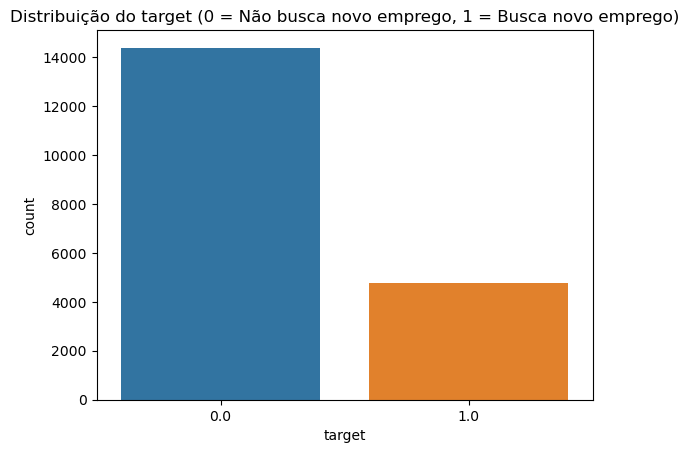

In [66]:
# Gráfico de contagem para a variável alvo
sns.countplot(x='target', data=df)
plt.title('Distribuição do target (0 = Não busca novo emprego, 1 = Busca novo emprego)')
plt.show() 

INTERPRETAÇÃO:  
 
Vemos duas barras, uma significativamente mais alta para o valor 0 e outra mais baixa para o valor 1, confirmando que ~75% dos candidatos não buscam um novo emprego, enquanto ~25% buscam. Isso é importante pois um desbalanceamento como este pode afetar modelos preditivos (um modelo poderia ter alta acurácia chutando sempre "0"). Portanto, ao avaliar modelos, teremos que olhar para métricas além da acurácia, como veremos adiante (ex: precision, recall para a classe 1).
 

### 2.2 - Distribuição das variáveis numéricas

##### Histogramas

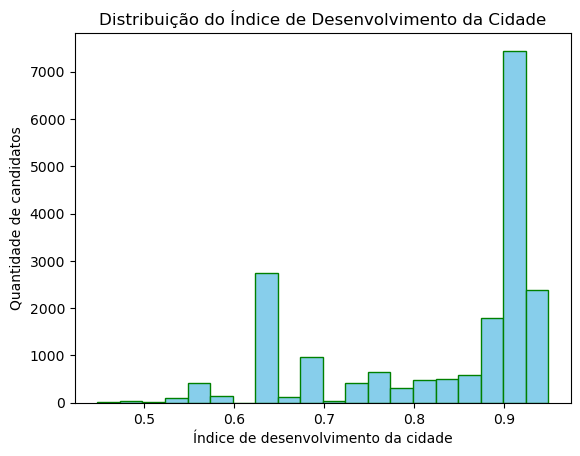

In [72]:
# Histograma para city_development_index
plt.hist(df['city_development_index'], bins=20, color='skyblue', edgecolor='green')
plt.title('Distribuição do Índice de Desenvolvimento da Cidade')
plt.xlabel('Índice de desenvolvimento da cidade')
plt.ylabel('Quantidade de candidatos')
plt.show()

OBSERVAÇÃO: 
Índice de desenvolvimento da cidade: Vemos um histograma concentrado na faixa alta (muitos candidatos de cidades com índice 0.8–0.9). Podemos notar uma cauda para a esquerda indicando alguns candidatos de cidades menos desenvolvidas, mas em menor número.

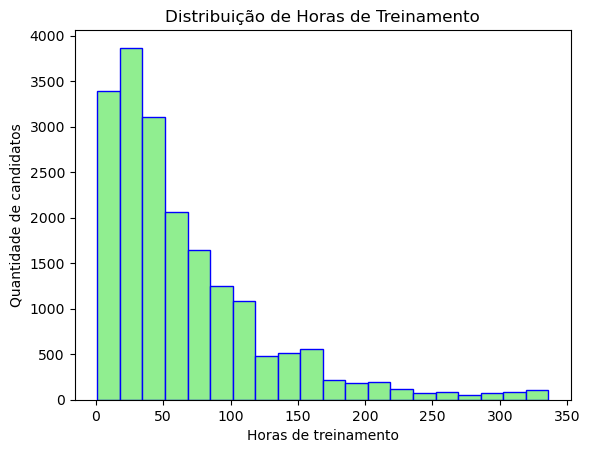

In [77]:
# Histograma para training_hours
plt.hist(df['training_hours'], bins=20, color='lightgreen', edgecolor='blue')
plt.title('Distribuição de Horas de Treinamento')
plt.xlabel('Horas de treinamento')
plt.ylabel('Quantidade de candidatos')
plt.show()

OBSERVAÇÃO: 
Horas de treinamento: O histograma mostra que a maioria dos candidatos tem horas de treinamento mais baixas (talvez um pico em torno de poucas dezenas de horas) e uma cauda longa para a direita (poucos candidatos com centenas de horas). Podemos até observar possíveis outliers (valores extremos) na faixa de 300+ horas.

##### boxplot

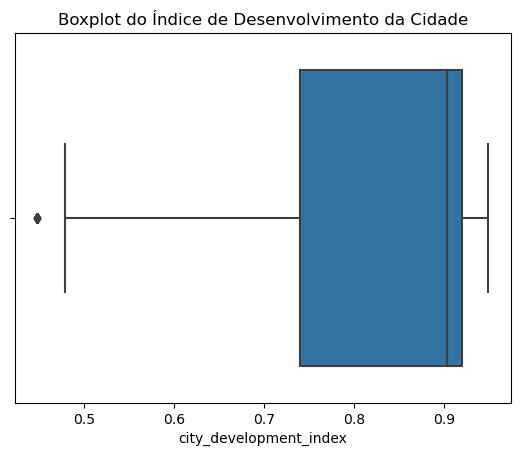

In [85]:
# Boxplot de city_development_index
sns.boxplot(x=df['city_development_index'])
plt.title('Boxplot do Índice de Desenvolvimento da Cidade')
plt.show()

In [89]:
# Assumindo que df é seu dataframe e 'city_development_index' é sua coluna de interesse
Q1 = df['city_development_index'].quantile(0.25)
Q3 = df['city_development_index'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR  # Correção aqui: use ponto decimal
limite_superior = Q3 + 1.5 * IQR  # Correção aqui: use ponto decimal

outliers = df[(df['city_development_index'] < limite_inferior) | (df['city_development_index'] > limite_superior)]
print(outliers)



       enrollee_id     city  city_development_index gender  \
1523          8238  city_33                   0.448    NaN   
4744         30985  city_33                   0.448    NaN   
5010         27970  city_33                   0.448   Male   
5265         31194  city_33                   0.448    NaN   
5567           598  city_33                   0.448    NaN   
6127         18564  city_33                   0.448    NaN   
7724         31179  city_33                   0.448   Male   
7864         26838  city_33                   0.448   Male   
9134          4858  city_33                   0.448    NaN   
10401        19463  city_33                   0.448   Male   
13549        28317  city_33                   0.448    NaN   
14913         3891  city_33                   0.448   Male   
15114         4776  city_33                   0.448    NaN   
16555        30131  city_33                   0.448   Male   
16784        10486  city_33                   0.448    NaN   
17701   

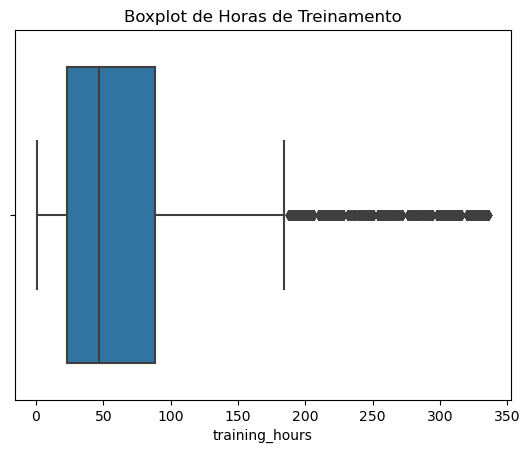

In [91]:
# Boxplot de training_hours
sns.boxplot(x=df['training_hours'])
plt.title('Boxplot de Horas de Treinamento')
plt.show()

In [93]:
# Assumindo que df é seu dataframe e 'training_hours' é sua coluna de interesse
Q1 = df['training_hours'].quantile(0.25)
Q3 = df['training_hours'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['training_hours'] < limite_inferior) | (df['training_hours'] > limite_superior)]
print(outliers)


       enrollee_id      city  city_development_index  gender  \
35            4866  city_103                   0.920    Male   
69            4830   city_90                   0.698     NaN   
89           32401  city_103                   0.920  Female   
110           4789   city_67                   0.855    Male   
119          14199  city_160                   0.920    Male   
...            ...       ...                     ...     ...   
19100        16368   city_65                   0.802     NaN   
19107        15133  city_160                   0.920    Male   
19117         3458  city_114                   0.926    Male   
19118        12211  city_126                   0.479     NaN   
19145          155   city_44                   0.725     NaN   

           relevent_experience enrolled_university education_level  \
35     Has relevent experience       no_enrollment        Graduate   
69      No relevent experience                 NaN             NaN   
89     Has relevent e

Observação: Futuramente devemos tratar esses outliers de training_hours.

O boxplot nos ajuda a visualizar a dispersão dos dados e identificar possíveis anomalias. A presença de muitos outliers acima de 200 horas sugere que alguns indivíduos receberam treinamento muito maior do que o normal, o que pode ser um comportamento esperado ou um erro nos dados.
 

### 2.3 - Relação entre variáveis indenpendentes e a variável alvo(dependente)

##### 2.3.1. Horas de treinamento

# Boxplot de training_hours separado por target
sns.boxplot(x='target', y='training_hours', data=df)
plt.title('Horas de Treinamento vs Mudança de Emprego')
plt.xlabel('Target (0=Não busca, 1=Busca novo emprego)')
plt.ylabel('Horas de Treinamento')
plt.show()

INTERPRETAÇÃO:
 
As caixas (distribuições) de horas de treinamento para target=0 e target=1 são muito similares (mesma mediana, intervalos parecidos), significa que horas de treinamento não diferem muito entre quem quer e quem não quer mudar de emprego.
 
Pelo cálculo, a mediana foi 48 horas para quem não busca vs 46 horas para quem busca – uma diferença pequena.
 
Isso sugere que, isoladamente, training_hours pode não ser um forte indicador do target.forte indicador do target. 

 

##### 2.3.2 Indíce de desenvolvimento das cidades

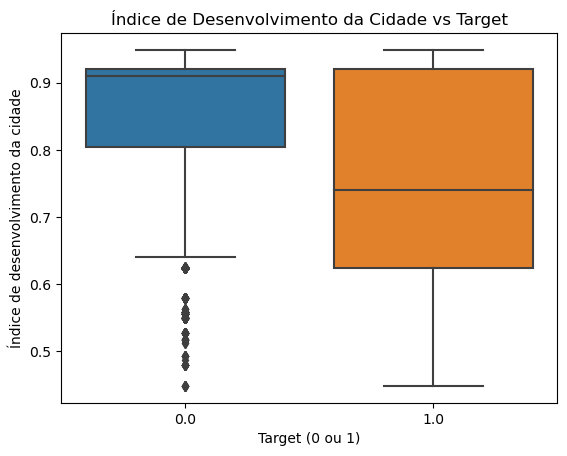

In [105]:
# Boxplot de city_development_index por target
sns.boxplot(x='target', y='city_development_index', data=df)
plt.title('Índice de Desenvolvimento da Cidade vs Target')
plt.xlabel('Target (0 ou 1)')
plt.ylabel('Índice de desenvolvimento da cidade')
plt.show()

INTERPRETAÇÃO:
 
Vemos uma diferença aqui. Análises numéricas mostraram que a média do índice de desenvolvimento para quem não busca novo emprego é ~0.85, enquanto para quem busca é ~0.75.
 
No boxplot, isso significaria que a mediana do grupo target=1 provavelmente será mais baixa que a do grupo 0.
 
Ou seja, candidatos de cidades menos desenvolvidas tendem a procurar mais novos empregos. 
Isso pode ocorrer porque eles buscam oportunidades em centros mais desenvolvidos ou melhores condições de trabalho.

##### 2.3.3 - Experiência relevante vs Target

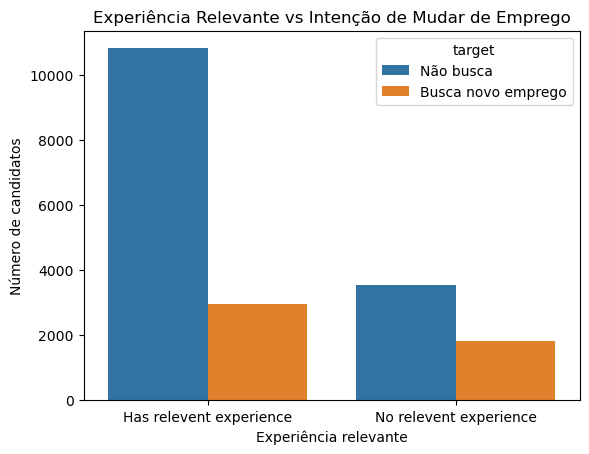

In [109]:
# Contagem de candidatos com/sem experiência relevante, diferenciada por target
sns.countplot(x='relevent_experience', hue='target', data=df)
plt.title('Experiência Relevante vs Intenção de Mudar de Emprego')
plt.xlabel('Experiência relevante')
plt.ylabel('Número de candidatos')
plt.legend(title='target', labels=['Não busca','Busca novo emprego'])
plt.show()

In [111]:
# Porcentagem de candidatos buscando novo emprego dentro de cada categoria de experiência relevante
exp_tab = pd.crosstab(df['relevent_experience'], df['target'], normalize='index') * 100
print(exp_tab)

target                         0.0        1.0
relevent_experience                          
Has relevent experience  78.531032  21.468968
No relevent experience   66.157287  33.842713


In [113]:
pd.__version__

'2.0.3'

INTERPRETAÇÃO:
 
Os resultados esperados indicam que candidatos sem experiência relevante têm maior probabilidade de buscar um novo emprego.
 
Por exemplo, pelos cálculos, ~33,8% dos candidatos sem experiência relevante estão procurando emprego, contra ~21,5% dos com experiência.
 
O gráfico exibe com a barra (target=1) relativamente mais alta no grupo "No relevant experience". Isso faz sentido: quem não tem experiência relevante talvez esteja em início de carreira ou insatisfeito por não atuar na área de formação, então estão ativamente buscando oportunidade. Já quem tem experiência relevante possivelmente está mais estabelecido na carreira atual, buscando menos mudança.

##### 2.3.4 - Nivel Educacional vc Target

In [ ]:
# Contagem de candidatos com/sem experiência relevante, diferenciada por target
sns.countplot(x='relevent_experience', hue='target', data=df)
plt.title('Experiência Relevante vs Intenção de Mudar de Emprego')
plt.xlabel('Experiência relevante')
plt.ylabel('Número de candidatos')
plt.legend(title='target', labels=['Não busca','Busca novo emprego'])
plt.show()

In [ ]:
# Contagem de candidatos com/sem experiência relevante, diferenciada por target
sns.countplot(x='relevent_experience', hue='target', data=df)
plt.title('Experiência Relevante vs Intenção de Mudar de Emprego')
plt.xlabel('Experiência relevante')
plt.ylabel('Número de candidatos')
plt.legend(title='target', labels=['Não busca','Busca novo emprego'])
plt.show()

In [ ]:
# Contagem de candidatos com/sem experiência relevante, diferenciada por target
sns.countplot(x='relevent_experience', hue='target', data=df)
plt.title('Experiência Relevante vs Intenção de Mudar de Emprego')
plt.xlabel('Experiência relevante')
plt.ylabel('Número de candidatos')
plt.legend(title='target', labels=['Não busca','Busca novo emprego'])
plt.show()

##### 2.3.5 - Experiencia em anos vs Target

##### 2.3.6 - Tamamnho da empresa vs Target

### 2.4  - Correlações entre as variáveis  

##### 2.4.1 - Matriz de Correlação

In [123]:
# Converter target para int (era float no carregamento) para calcular correlação
df['target'] = df['target'].astype(int)
 

In [125]:
# Selecionar apenas colunas numéricas para correlação
numeric_cols = ['city_development_index', 'training_hours', 'target']
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

                        city_development_index  training_hours    target
city_development_index                1.000000        0.001920 -0.341665
training_hours                        0.001920        1.000000 -0.021577
target                               -0.341665       -0.021577  1.000000


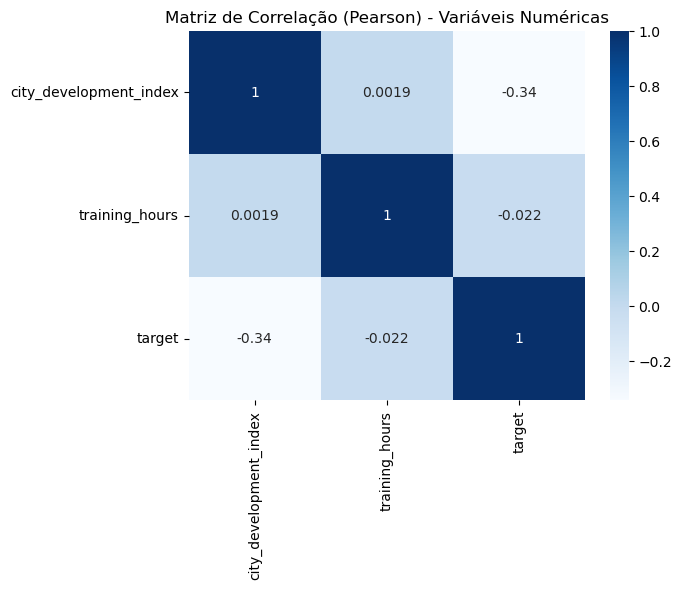

In [127]:
# Plotar heatmap de correlação
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Matriz de Correlação (Pearson) - Variáveis Numéricas')
plt.show()

INTERPRETAÇÃO:
 
O coeficiente de correlação entre city_development_index e target é cerca de -0.34, indicando uma correlação negativa moderada: quanto maior o índice de desenvolvimento da cidade, menor a chance do candidato buscar um novo emprego (e vice-versa).
 
 
training_hours tem correlação praticamente nula (-0.02) com target linearmente, confirmando que não há relação linear forte (pode ainda haver relação não-linear, mas linearmente nada significativo).
 
 
As variáveis numéricas entre si (city_development_index vs training_hours) também não têm correlação linear (0.002, irrelevante), o que era esperado pois tratam de aspectos distintos.

In [ ]:
CONCLUSÕES: